In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
import numpy as np


# Verifica GPU
print("GPU disponible:", tf.config.list_physical_devices('GPU'))

2025-10-27 19:52:38.051022: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-10-27 19:52:38.051304: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-10-27 19:52:38.113378: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


GPU disponible: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
#Cargar datos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

mat_contents = scipy.io.loadmat(os.path.join("/home/ivana/ml_projects/allFaces.mat"))
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])


/tmp/ipykernel_2508/1052741379.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m = int(mat_contents['m'])
/tmp/ipykernel_2508/1052741379.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n = int(mat_contents['n'])


In [4]:
# Create etiquetas para cada cara
labels = np.zeros(faces.shape[1])
for i in range(len(nfaces)):
  labels[np.sum(nfaces[:(i)]):np.sum(nfaces[:(i+1)])] = i+1

# Agregarlas etiquetas al arreglo faces
faces = np.concatenate((labels.reshape((1, faces.shape[1])), faces), axis=0)



In [5]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import numpy as np

#Ordenar el areglo en vectores columna
faces_aux = faces.T
X = faces_aux[:,1:]
y = faces_aux[:,0]
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Imprimir las formas de los conjuntos de entrenamiento y prueba
print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)


Forma de X_train: (1928, 32256)
Forma de y_train: (1928,)
Forma de X_test: (482, 32256)
Forma de y_test: (482,)


In [6]:
import numpy as np

# Calcular la cantidad de imágenes de cada dígito en X_train y X_test
num_imagenes_digito_train = {int(digito): int(np.sum(y_train == digito)) for digito in np.unique(y_train)}
num_imagenes_digito_test = {int(digito): int(np.sum(y_test == digito)) for digito in np.unique(y_test)}

# Imprimir la cantidad de imágenes de cada dígito en X_train y X_test
print("Número de imágenes de cada dígito en X_train:")
print(dict(sorted(num_imagenes_digito_train.items())))

print("\nNúmero de imágenes de cada dígito en X_test:")
print(dict(sorted(num_imagenes_digito_test.items())))

Número de imágenes de cada dígito en X_train:
{1: 51, 2: 50, 3: 51, 4: 51, 5: 50, 6: 51, 7: 51, 8: 51, 9: 51, 10: 51, 11: 48, 12: 48, 13: 48, 14: 51, 15: 50, 16: 51, 17: 51, 18: 51, 19: 51, 20: 51, 21: 51, 22: 51, 23: 51, 24: 52, 25: 52, 26: 51, 27: 51, 28: 51, 29: 51, 30: 51, 31: 51, 32: 51, 33: 51, 34: 51, 35: 51, 36: 51, 37: 51, 38: 51}

Número de imágenes de cada dígito en X_test:
{1: 13, 2: 12, 3: 13, 4: 13, 5: 12, 6: 13, 7: 13, 8: 13, 9: 13, 10: 13, 11: 12, 12: 11, 13: 12, 14: 12, 15: 12, 16: 12, 17: 12, 18: 13, 19: 13, 20: 13, 21: 13, 22: 13, 23: 13, 24: 12, 25: 12, 26: 13, 27: 13, 28: 13, 29: 13, 30: 13, 31: 13, 32: 13, 33: 13, 34: 13, 35: 13, 36: 13, 37: 13, 38: 13}


/home/ivana/miniconda3/envs/deeplearning/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


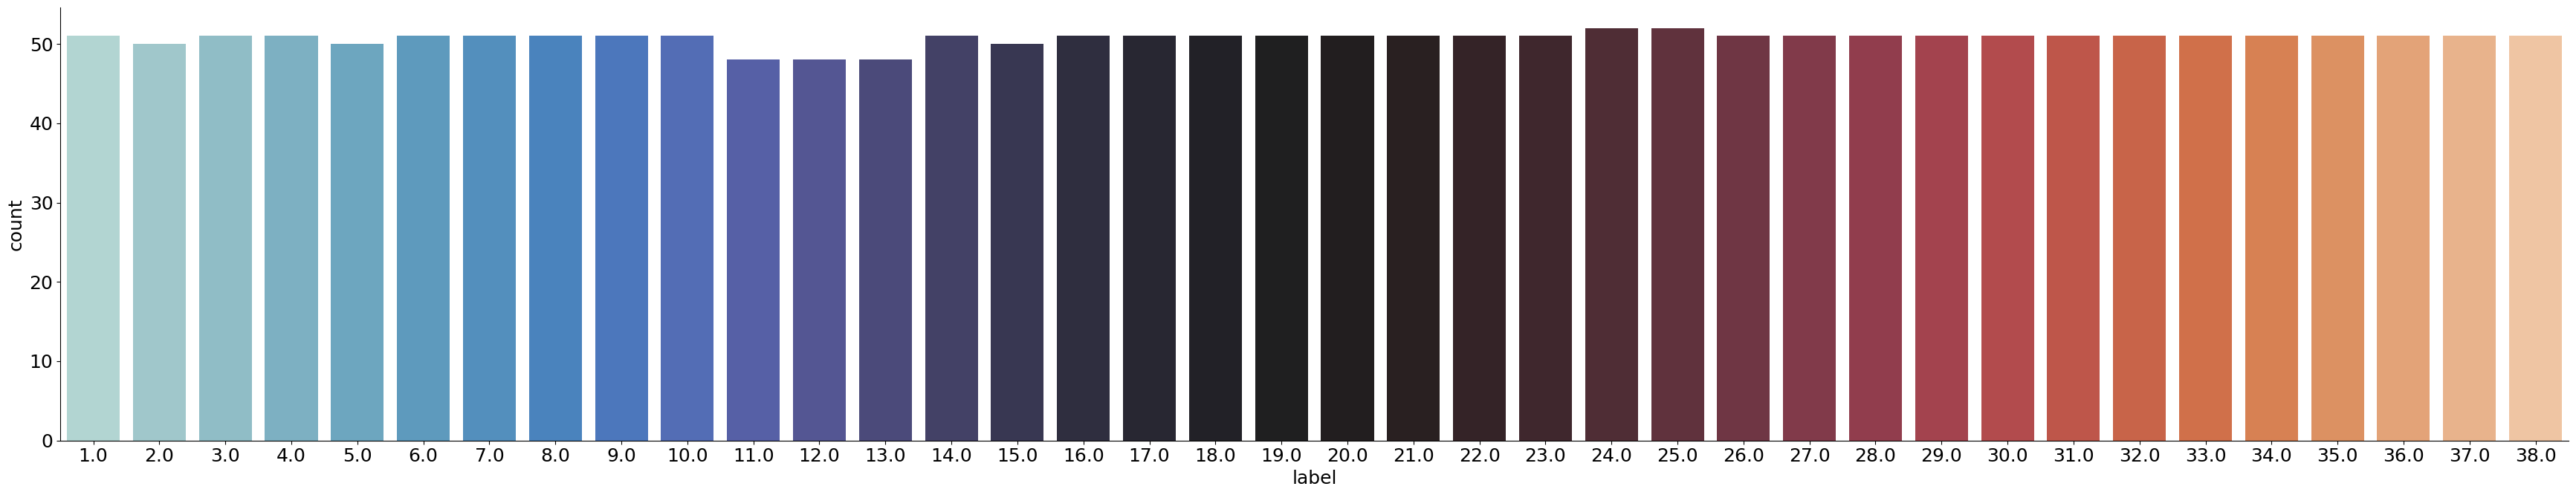

label
1.0     51
2.0     50
3.0     51
4.0     51
5.0     50
6.0     51
7.0     51
8.0     51
9.0     51
10.0    51
11.0    48
12.0    48
13.0    48
14.0    51
15.0    50
16.0    51
17.0    51
18.0    51
19.0    51
20.0    51
21.0    51
22.0    51
23.0    51
24.0    52
25.0    52
26.0    51
27.0    51
28.0    51
29.0    51
30.0    51
31.0    51
32.0    51
33.0    51
34.0    51
35.0    51
36.0    51
37.0    51
38.0    51
Name: count, dtype: int64


In [7]:
# Convertir y_train a un DataFrame de pandas
df_train = pd.DataFrame({'label': y_train})

# Crear una cuadrícula de gráficos con una gráfica para cada dígito
g = sns.FacetGrid(df_train, height=7, aspect=5)
g.map(sns.countplot, 'label', palette="icefire",order=sorted(df_train['label'].unique()))

plt.show()

# Obtener el recuento de valores únicos en y_train
print(df_train['label'].value_counts().sort_index())


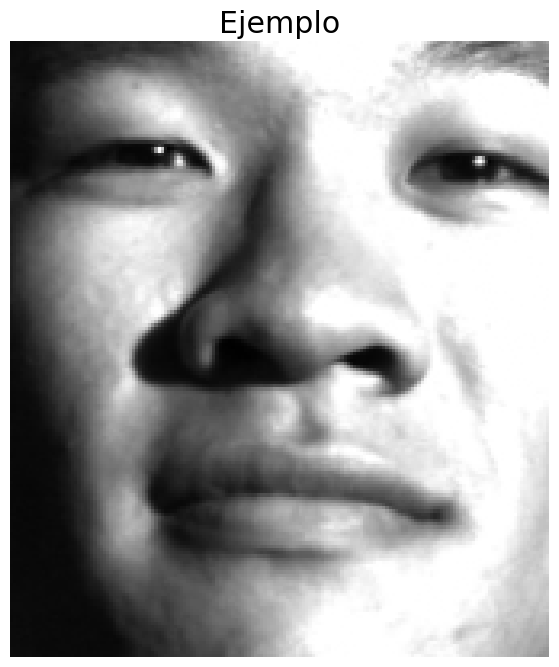

In [8]:
#Imagen ejemplo
img = X_train[9,:]
img = img.reshape((m,n)).T
plt.imshow(img,cmap='gray')
plt.title("Ejemplo")
plt.axis("off")
plt.show()

In [9]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255


In [10]:
# Reshape
X_train = X_train.reshape(-1,n,m,1)
X_test = X_test.reshape(-1,n,m,1)

#Tamaños
print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)
print("X_test shape: ",X_test.shape)
print("y_test shape: ",y_test.shape)


X_train shape:  (1928, 192, 168, 1)
y_train shape:  (1928,)
X_test shape:  (482, 192, 168, 1)
y_test shape:  (482,)


In [11]:
#One hot encoding
from tensorflow.keras.utils import to_categorical

# Restar 1 a las etiquetas para que empiecen desde 0
y_train = y_train - 1
y_test = y_test - 1

# Aplicar one-hot encoding especificando num_classes
y_train = to_categorical(y_train, num_classes=38)
y_test = to_categorical(y_test, num_classes=38)

# Verificar las dimensiones
num_clases = y_test.shape[1]
print("Forma de y_train después de one-hot:", y_train.shape)
print("Forma de y_test después de one-hot:", y_test.shape)
print("Número de clases:", num_clases)

# Verificar que tenemos todas las clases
print("Número único de clases en y_train:", len(np.unique(np.argmax(y_train, axis=1))))
print("Número único de clases en y_test:", len(np.unique(np.argmax(y_test, axis=1))))

Forma de y_train después de one-hot: (1928, 38)
Forma de y_test después de one-hot: (482, 38)
Número de clases: 38
Número único de clases en y_train: 38
Número único de clases en y_test: 38


In [12]:
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (n,m,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(38, activation = "softmax"))

In [13]:
# Define the optimizer
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [14]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [15]:
epochs = 30  # for better result increase the epochs
batch_size = 300

In [16]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center = False,  # set input mean to 0 over the dataset
        samplewise_center = False,  # set each sample mean to 0
        featurewise_std_normalization = False,  # divide inputs by std of the dataset
        samplewise_std_normalization = False,  # divide each input by its std
        zca_whitening = False,  # dimesion reduction
        rotation_range = 0,  # randomly rotate images in the range 5 degrees
        zoom_range = 0, # Randomly zoom image 10%
        width_shift_range = 0,  # randomly shift images horizontally 10%
        height_shift_range = 0,  # randomly shift images vertically 10%
        horizontal_flip = False,  # randomly flip images
        vertical_flip = False)  # randomly flip images

datagen.fit(X_train)

In [17]:
# Fit the model
history = model.fit(datagen.flow(X_train,y_train,batch_size=batch_size), validation_data=(X_test,y_test), epochs=epochs)


# Final evaluation of the model
scores = model.evaluate(X_test,y_test, verbose=0)
print("Accuracy: %0.2f%%" % (scores[1]*100))

Epoch 1/30


2025-10-27 19:52:51.815909: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1761616373.865790    6462 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7/7 [==============================] - 9s 420ms/step - loss: 3.6811 - accuracy: 0.0228 - val_loss: 3.6070 - val_accuracy: 0.0519
Epoch 2/30
7/7 [==============================] - 1s 122ms/step - loss: 3.5600 - accuracy: 0.0612 - val_loss: 3.5511 - val_accuracy: 0.2012
Epoch 3/30
7/7 [==============================] - 1s 76ms/step - loss: 3.4068 - accuracy: 0.1390 - val_loss: 3.3132 - val_accuracy: 0.3257
Epoch 4/30
7/7 [==============================] - 1s 76ms/step - loss: 3.0855 - accuracy: 0.2163 - val_loss: 2.8459 - val_accuracy: 0.4357
Epoch 5/30
7/7 [==============================] - 1s 76ms/step - loss: 2.6245 - accuracy: 0.3262 - val_loss: 2.2849 - val_accuracy: 0.6183
Epoch 6/30
7/7 [==============================] - 1s 149ms/step - loss: 2.1122 - accuracy: 0.4487 - val_loss: 1.7065 - val_accuracy: 0.7718
Epoch 7/30
7/7 [==============================] - 1s 89ms/step - loss: 1.6274 - accuracy: 0.5840 - val_loss: 1.2555 - val_accuracy: 0.8154
Epoch 8/30
7/7 [===================

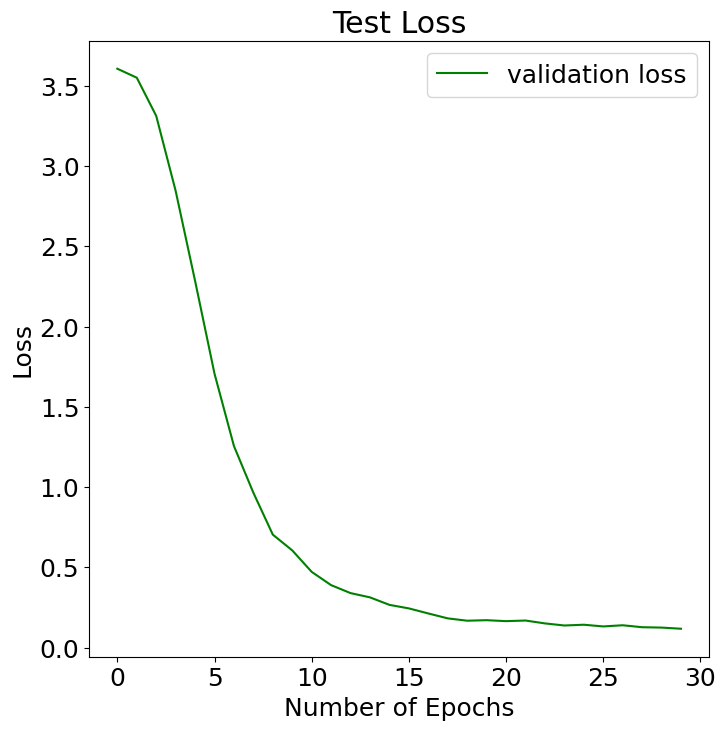

In [18]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='g', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [19]:
print("\nNúmero de imágenes de cada dígito en X_test:")
print(num_imagenes_digito_test)


Número de imágenes de cada dígito en X_test:
{1: 13, 2: 12, 3: 13, 4: 13, 5: 12, 6: 13, 7: 13, 8: 13, 9: 13, 10: 13, 11: 12, 12: 11, 13: 12, 14: 12, 15: 12, 16: 12, 17: 12, 18: 13, 19: 13, 20: 13, 21: 13, 22: 13, 23: 13, 24: 12, 25: 12, 26: 13, 27: 13, 28: 13, 29: 13, 30: 13, 31: 13, 32: 13, 33: 13, 34: 13, 35: 13, 36: 13, 37: 13, 38: 13}


In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Configuración
num_classes = 38
class_names = [f"Persona {i+1:02d}" for i in range(num_classes)]

print("="*70)
print("ANÁLISIS DEL MODELO - YALE FACES (38 PERSONAS)")
print("="*70)
print(f"Modelo: {model.name}")
print(f"Input shape del modelo: {model.input_shape}")
print(f"Shape de X_test: {X_test.shape}")
print(f"Shape de y_test: {y_test.shape}")

# Hacer predicciones DIRECTAMENTE (sin preprocesamiento)
print("\nHaciendo predicciones...")
predictions = model.predict(X_test, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test

# Accuracy general
accuracy = np.mean(predicted_classes == true_classes)
print(f"\n{'='*70}")
print(f"✅ ACCURACY GENERAL: {accuracy*100:.2f}%")
print(f"   Predicciones correctas: {np.sum(predicted_classes == true_classes)}/{len(y_test)}")
print(f"   Predicciones incorrectas: {np.sum(predicted_classes != true_classes)}/{len(y_test)}")
print(f"{'='*70}")

# ===== ACCURACY POR PERSONA =====
print("\n" + "="*70)
print("ACCURACY POR PERSONA")
print("="*70)

person_accuracy = []
for person_id in range(num_classes):
    mask = true_classes == person_id
    if np.sum(mask) > 0:
        person_acc = np.mean(predicted_classes[mask] == true_classes[mask])
        person_accuracy.append((person_id, person_acc, np.sum(mask)))

# Ordenar por accuracy
person_accuracy.sort(key=lambda x: x[1], reverse=True)

print("\n🏆 TOP 10 - Mejor reconocimiento:")
for i, (person_id, acc, count) in enumerate(person_accuracy[:10], 1):
    print(f"  {i:2d}. {class_names[person_id]}: {acc*100:5.1f}% ({count} imágenes)")

print("\n⚠️  BOTTOM 10 - Necesitan mejorar:")
for i, (person_id, acc, count) in enumerate(person_accuracy[-10:], 1):
    print(f"  {i:2d}. {class_names[person_id]}: {acc*100:5.1f}% ({count} imágenes)")

ANÁLISIS DEL MODELO - YALE FACES (38 PERSONAS)
Modelo: sequential
Input shape del modelo: (None, 192, 168, 1)
Shape de X_test: (482, 192, 168, 1)
Shape de y_test: (482, 38)

Haciendo predicciones...
16/16 [==============================] - 0s 6ms/step

✅ ACCURACY GENERAL: 97.51%
   Predicciones correctas: 470/482
   Predicciones incorrectas: 12/482

ACCURACY POR PERSONA

🏆 TOP 10 - Mejor reconocimiento:
   1. Persona 01: 100.0% (13 imágenes)
   2. Persona 02: 100.0% (12 imágenes)
   3. Persona 03: 100.0% (13 imágenes)
   4. Persona 04: 100.0% (13 imágenes)
   5. Persona 05: 100.0% (12 imágenes)
   6. Persona 06: 100.0% (13 imágenes)
   7. Persona 07: 100.0% (13 imágenes)
   8. Persona 08: 100.0% (13 imágenes)
   9. Persona 09: 100.0% (13 imágenes)
  10. Persona 11: 100.0% (12 imágenes)

⚠️  BOTTOM 10 - Necesitan mejorar:
   1. Persona 36: 100.0% (13 imágenes)
   2. Persona 38: 100.0% (13 imágenes)
   3. Persona 10:  92.3% (13 imágenes)
   4. Persona 34:  92.3% (13 imágenes)
   5. Perso


ANÁLISIS DE ERRORES

Total de errores: 12 de 482 (2.49%)

10 confusiones más frecuentes:
   1. Persona 24 → Persona 10 : 1 veces
   2. Persona 25 → Persona 01 : 1 veces
   3. Persona 35 → Persona 28 : 1 veces
   4. Persona 29 → Persona 19 : 1 veces
   5. Persona 34 → Persona 31 : 1 veces
   6. Persona 20 → Persona 30 : 1 veces
   7. Persona 37 → Persona 36 : 1 veces
   8. Persona 10 → Persona 37 : 1 veces
   9. Persona 20 → Persona 03 : 1 veces
  10. Persona 29 → Persona 06 : 1 veces

Visualizando ejemplos de errores...


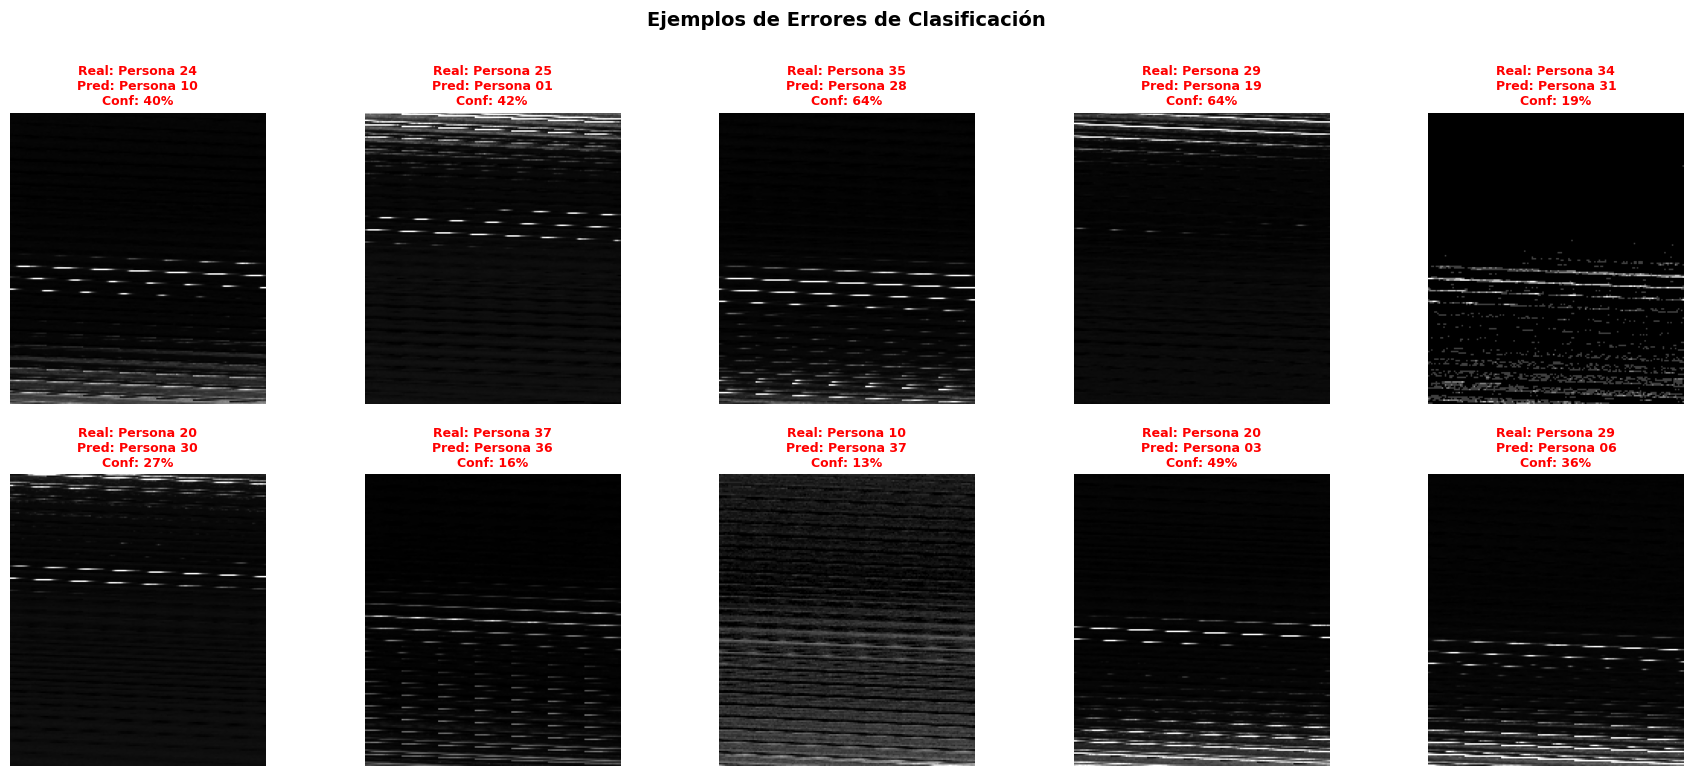

In [21]:
# Encontrar errores
errors = predicted_classes != true_classes
error_indices = np.where(errors)[0]

if len(error_indices) > 0:
    from collections import Counter
    
    print("\n" + "="*70)
    print("ANÁLISIS DE ERRORES")
    print("="*70)
    print(f"\nTotal de errores: {len(error_indices)} de {len(X_test)} ({len(error_indices)/len(X_test)*100:.2f}%)")
    
    # Confusiones más frecuentes
    confusions = [(true_classes[i], predicted_classes[i]) for i in error_indices]
    most_common = Counter(confusions).most_common(10)
    
    print("\n10 confusiones más frecuentes:")
    for i, ((true_id, pred_id), count) in enumerate(most_common, 1):
        print(f"  {i:2d}. {class_names[true_id]} → {class_names[pred_id]} : {count} veces")
    
    # Visualizar ejemplos de errores
    print("\nVisualizando ejemplos de errores...")
    n_errors_show = min(10, len(error_indices))
    
    fig, axes = plt.subplots(2, 5, figsize=(18, 8))
    axes = axes.ravel()
    
    for i, idx in enumerate(error_indices[:n_errors_show]):
        image = X_test[idx]
        true_id = true_classes[idx]
        pred_id = predicted_classes[idx]
        confidence = predictions[idx][pred_id]
        
        if len(image.shape) == 3 and image.shape[2] == 1:
            axes[i].imshow(image.squeeze(), cmap='gray')
        else:
            axes[i].imshow(image, cmap='gray')
        
        title = f"Real: {class_names[true_id]}\nPred: {class_names[pred_id]}\nConf: {confidence*100:.0f}%"
        axes[i].set_title(title, color='red', fontsize=9, fontweight='bold')
        axes[i].axis('off')
    
    plt.suptitle('Ejemplos de Errores de Clasificación', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("\n🎉 ¡Modelo perfecto! No hay errores en el conjunto de prueba.")

16/16 [==============================] - 0s 8ms/step


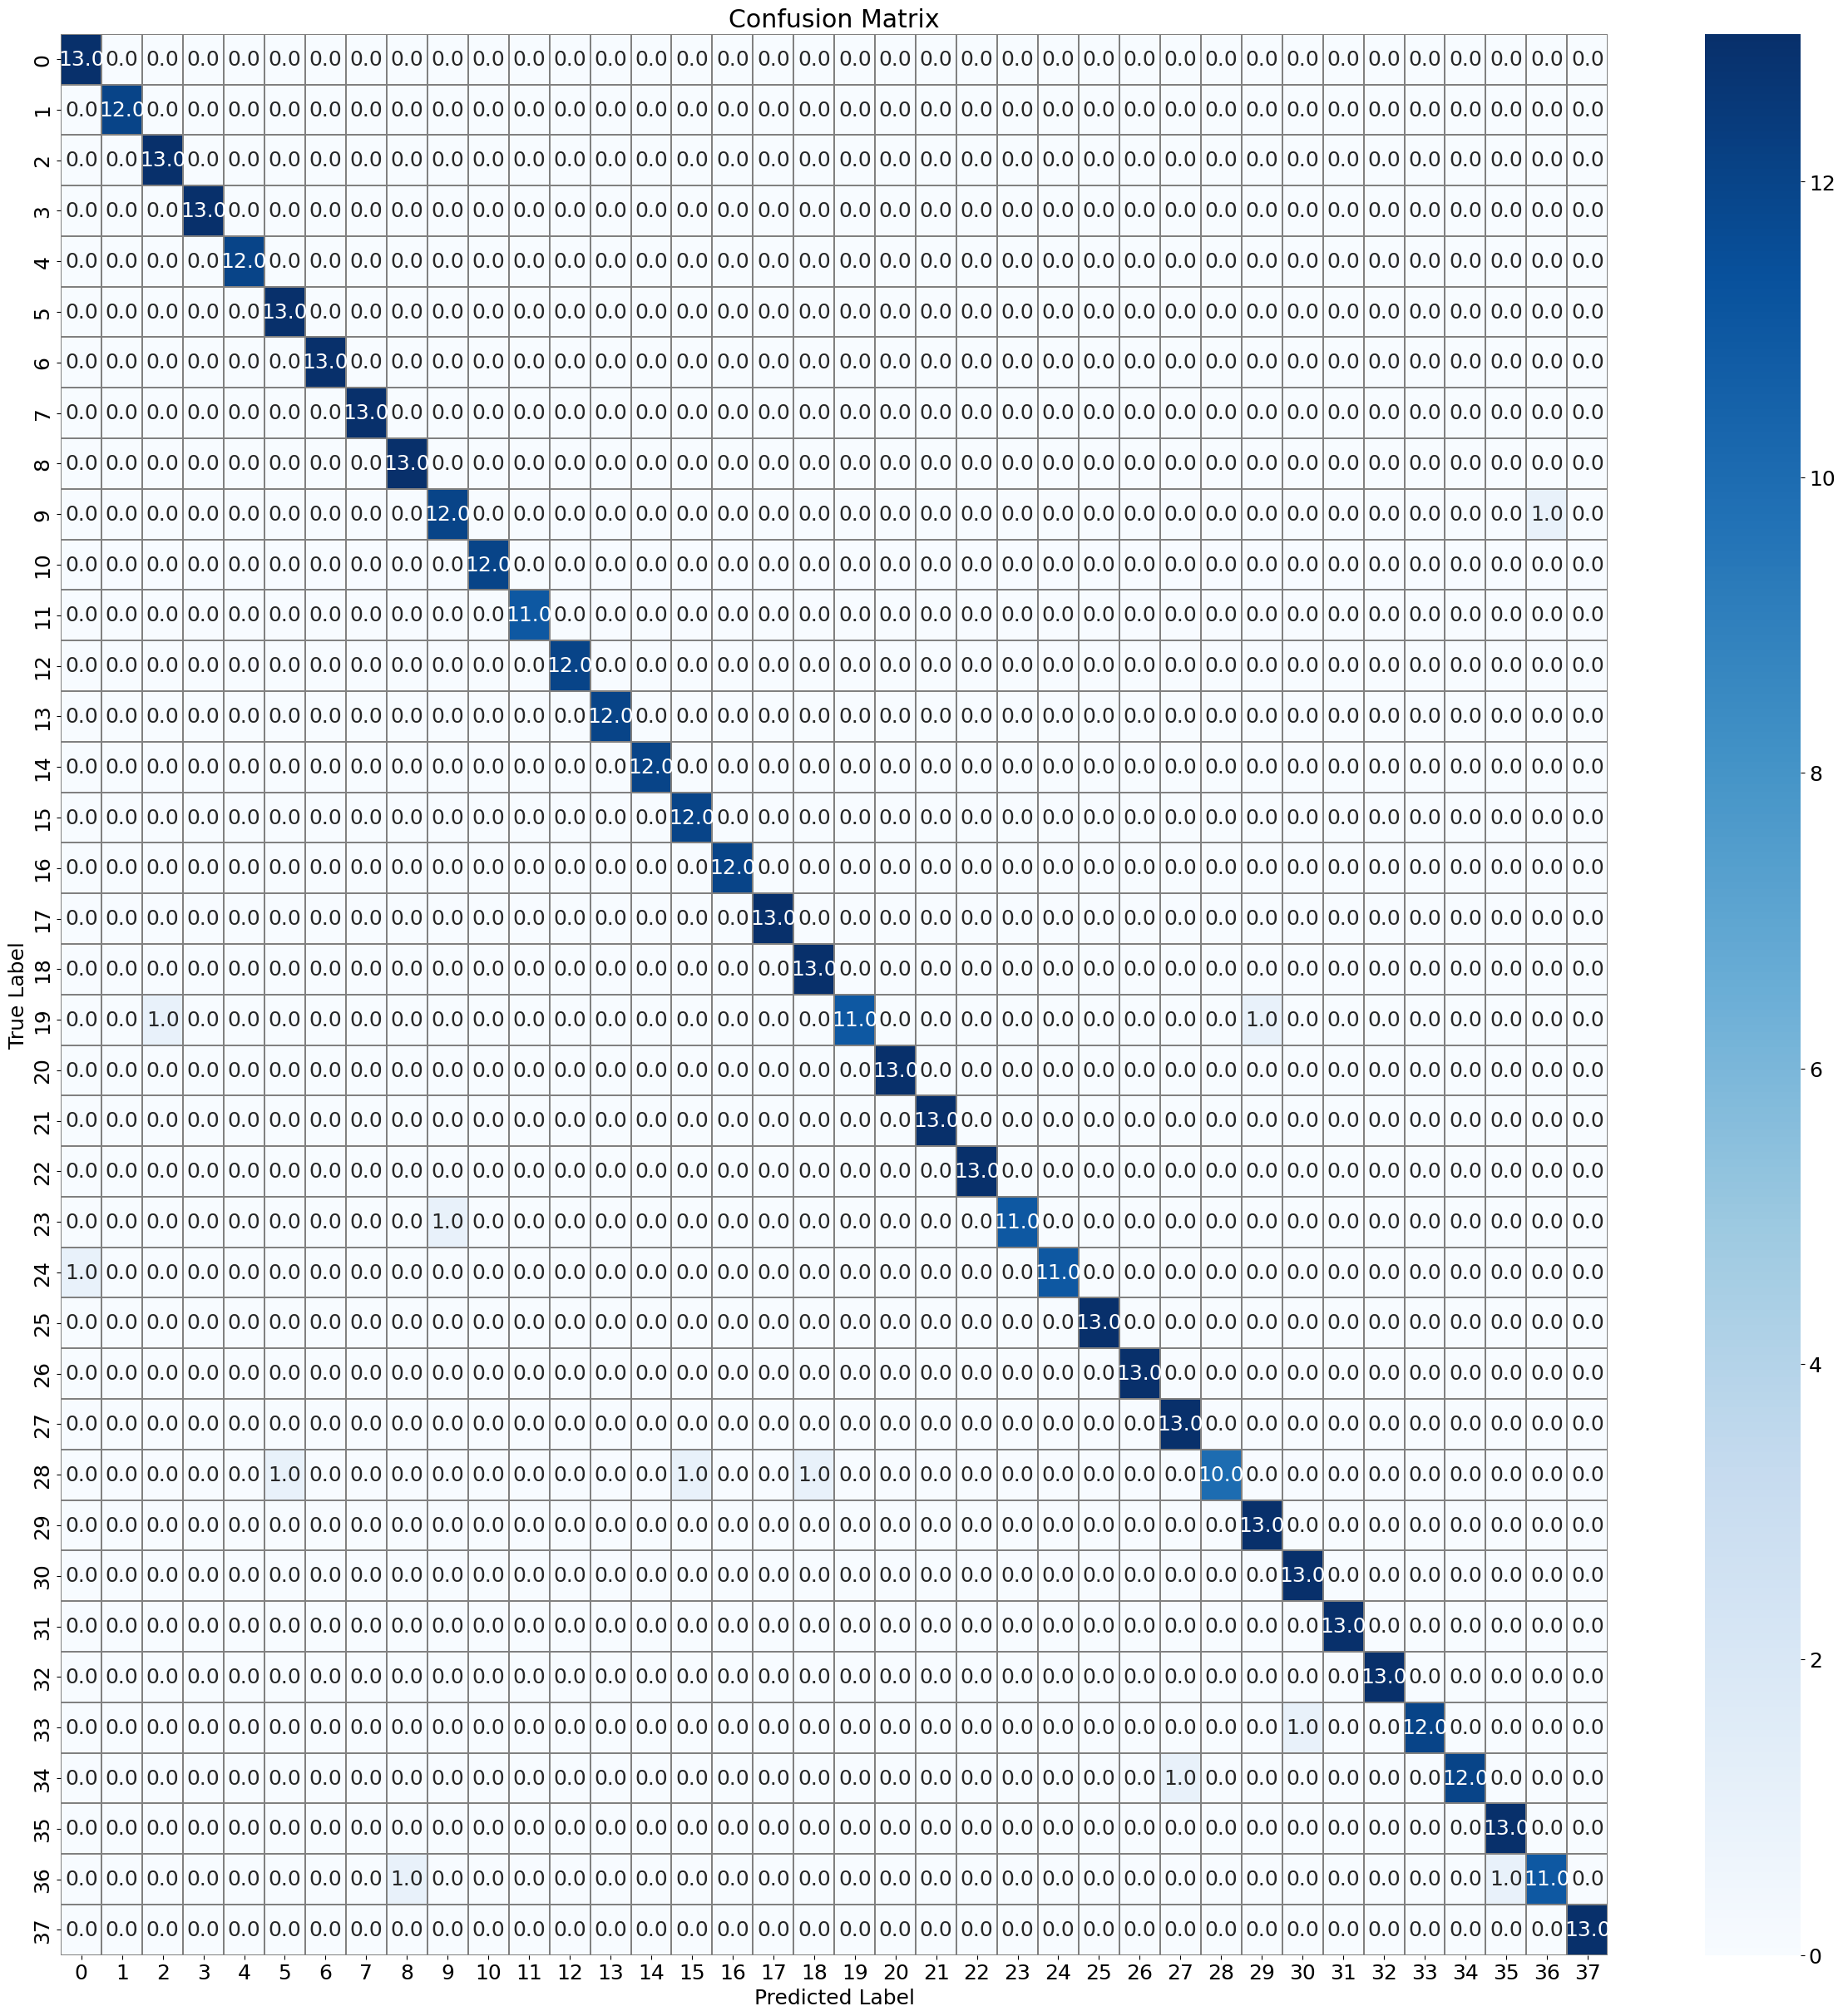

In [22]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(30, 30))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [23]:
# Asumiendo que ya tienes tu generador configurado y entrenaste el modelo
# Por ejemplo: después de model.fit(...)

# 1. Crear y guardar class_names (si usas nombres generados)
class_names = [f"persona_{i+1}" for i in range(38)]  # O usa train_generator.class_indices si viene de carpetas
np.save('nombres_clases.npy', class_names)
print("Nombres de clases guardados como 'nombres_clases.npy'")

# 2. Guardar el modelo
model.save('modelo_rostros.h5')
print("Modelo guardado como 'modelo_rostros.h5'")

print("¡Todo guardado exitosamente!")

Nombres de clases guardados como 'nombres_clases.npy'


/home/ivana/miniconda3/envs/deeplearning/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Modelo guardado como 'modelo_rostros.h5'
¡Todo guardado exitosamente!


In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
# Cargar modelo
model = load_model('modelo_rostros.h5')

# Cargar nombres
class_names = np.load('nombres_clases.npy', allow_pickle=True).tolist()

print("Modelo y nombres cargados.")
# Ahora úsalos en predicciones: nombre = class_names[clase_predicha]

Modelo y nombres cargados.


In [37]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# === REMAPEAR ETIQUETAS A 0,1,2,...,37 ===
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convierte cualquier etiqueta a 0–37

# Verificar que ahora sí están en 0–37
print("Etiquetas originales únicas:", np.unique(y))
print("Etiquetas codificadas únicas (0 a 37):", np.unique(y_encoded))
print(f"Número de clases: {len(np.unique(y_encoded))}")  # Debe ser 38

# === Dividir con etiquetas codificadas ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Convertir a int
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# === GUARDAR EL MAPEO PARA USARLO DESPUÉS ===
np.save('label_encoder_classes.npy', label_encoder.classes_)  # IDs originales
class_names = [f"persona_{i+1}" for i in range(38)]
np.save('nombres_clases.npy', class_names)

Etiquetas originales únicas: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38.]
Etiquetas codificadas únicas (0 a 37): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Número de clases: 38


In [38]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

# ================= CARGAR MODELO Y CLASES =================
MODEL_PATH = 'modelo_rostros.h5'
CLASES_PATH = 'nombres_clases.npy'

model = load_model(MODEL_PATH)
class_names = np.load(CLASES_PATH, allow_pickle=True).tolist()

print(f"Modelo y clases cargados. Total clases: {len(class_names)}")

# ================= TUS DATOS (ya los tienes) =================
# X_train, X_test, y_train, y_test → ya definidos
# Suponiendo que las imágenes están aplanadas: (n_samples, n_pixels)

IMG_HEIGHT = n # Cambia si usaste otro
IMG_WIDTH = m
N_PIXELS = IMG_HEIGHT * IMG_WIDTH  # Debe coincidir con X_train.shape[1]


# ================= FUNCIÓN: Predecir un batch de imágenes =================
def predecir_batch(X_batch, model, class_names):
    # Redimensionar: (n_samples, n_pixels) → (n_samples, 64, 64, 1)
    X_batch = X_batch.reshape(-1, IMG_HEIGHT, IMG_WIDTH, 1)
    X_batch = X_batch / 255.0  # Normalización

    # Predicción
    predicciones = model.predict(X_batch, verbose=0)
    clases_predichas = np.argmax(predicciones, axis=1)
    confianzas = np.max(predicciones, axis=1)

    return clases_predichas, confianzas, predicciones

# ================= EJEMPLO: Predecir en X_test =================
print("\nHaciendo predicciones en X_test...")

y_pred, confianzas, probs = predecir_batch(X_test, model, class_names)

# ================= MOSTRAR ALGUNOS RESULTADOS =================
print("\nPrimeras 10 predicciones en X_test:")
for i in range(min(10, len(X_test))):
    real = int(y_test[i])
    pred = y_pred[i]
    confianza = confianzas[i]
    nombre_real = class_names[real]
    nombre_pred = class_names[pred]
    acierto = "Correcto" if real == pred else "Incorrecto"
    
    print(f"Imagen {i}: Real: {nombre_real} | Pred: {nombre_pred} | Conf: {confianza*100:5.1f}% → {acierto}")

Modelo y clases cargados. Total clases: 38

Haciendo predicciones en X_test...

Primeras 10 predicciones en X_test:
Imagen 0: Real: persona_24 | Pred: persona_24 | Conf:  99.7% → Correcto
Imagen 1: Real: persona_15 | Pred: persona_15 | Conf: 100.0% → Correcto
Imagen 2: Real: persona_10 | Pred: persona_10 | Conf:  94.0% → Correcto
Imagen 3: Real: persona_10 | Pred: persona_10 | Conf:  99.9% → Correcto
Imagen 4: Real: persona_38 | Pred: persona_38 | Conf: 100.0% → Correcto
Imagen 5: Real: persona_3 | Pred: persona_3 | Conf:  99.9% → Correcto
Imagen 6: Real: persona_9 | Pred: persona_9 | Conf:  99.6% → Correcto
Imagen 7: Real: persona_30 | Pred: persona_30 | Conf:  80.5% → Correcto
Imagen 8: Real: persona_18 | Pred: persona_18 | Conf:  95.9% → Correcto
Imagen 9: Real: persona_16 | Pred: persona_16 | Conf:  98.4% → Correcto


Mostrando 5 ejemplos del conjunto de prueba (X_test):

--- Imagen 0 de X_test ---


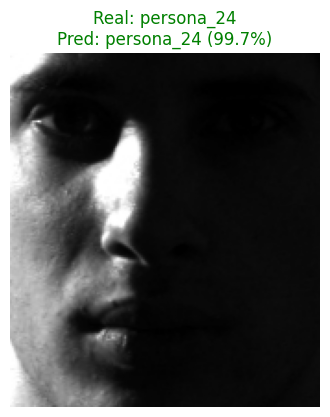


--- Imagen 10 de X_test ---


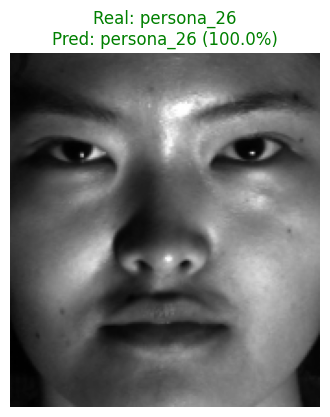


--- Imagen 20 de X_test ---


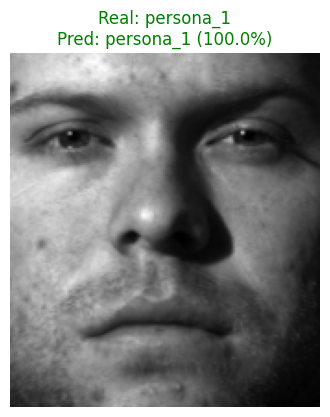


--- Imagen 30 de X_test ---


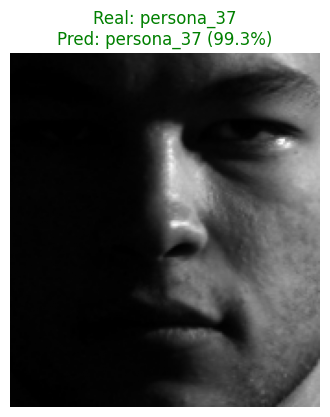


--- Imagen 66 de X_test ---


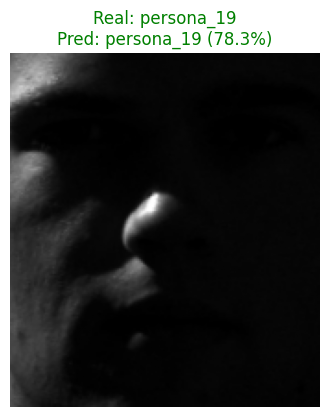

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# ================= CONFIGURACIÓN =================
IMG_HEIGHT = m   # Ajusta si usaste otro
IMG_WIDTH = n

# ================= FUNCIÓN CORREGIDA =================
def mostrar_imagen_con_prediccion(idx, X_test, y_test, y_pred, confianzas, class_names):
    # Redimensionar correctamente: (n_pixels,) → (height, width)
    img = X_test[idx].reshape(IMG_HEIGHT, IMG_WIDTH).T
    
    real = class_names[int(y_test[idx])]
    pred = class_names[y_pred[idx]]
    confianza = confianzas[idx] * 100
    
    plt.figure(figsize=(4, 5))
    plt.imshow(img, cmap='gray')
    color = 'green' if real == pred else 'red'
    plt.title(f'Real: {real}\nPred: {pred} ({confianza:.1f}%)', color=color, fontsize=12)
    plt.axis('off')
    plt.show()

# ================= MOSTRAR VARIAS IMÁGENES DE PRUEBA =================
print("Mostrando 5 ejemplos del conjunto de prueba (X_test):")

for i in [0, 10, 20, 30, 66]:  # Puedes cambiar los índices
    if i < len(X_test):
        print(f"\n--- Imagen {i} de X_test ---")
        mostrar_imagen_con_prediccion(i, X_test, y_test, y_pred, confianzas, class_names)
    else:
        print(f"Índice {i} fuera de rango (X_test tiene {len(X_test)} imágenes)")

Mostrando solo errores en X_test:

--- ERROR en índice 13 ---


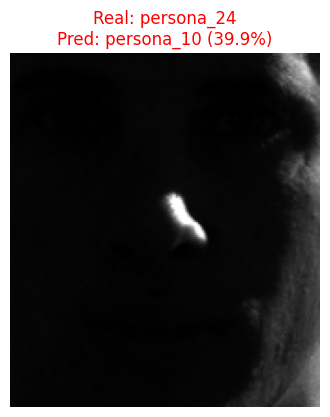


--- ERROR en índice 82 ---


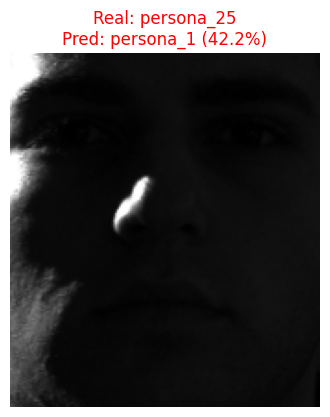


--- ERROR en índice 127 ---


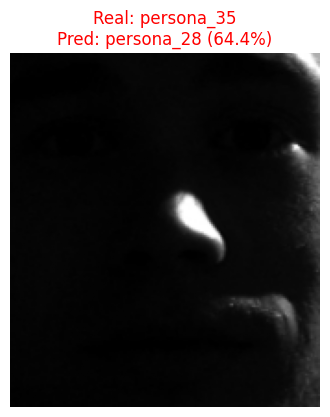


--- ERROR en índice 174 ---


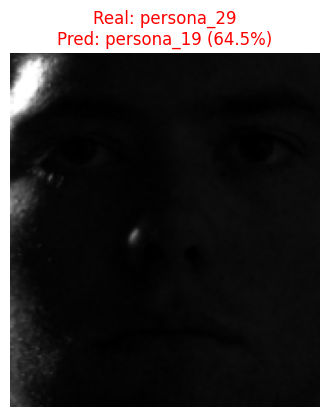


--- ERROR en índice 180 ---


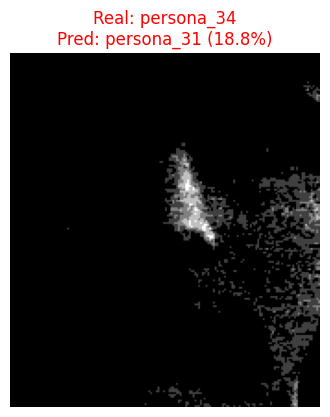


--- ERROR en índice 278 ---


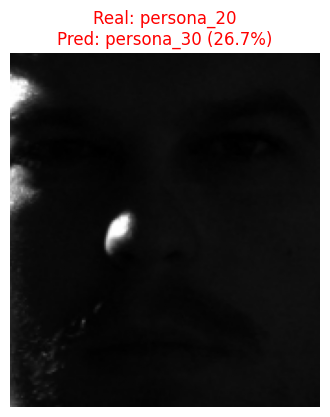


--- ERROR en índice 280 ---


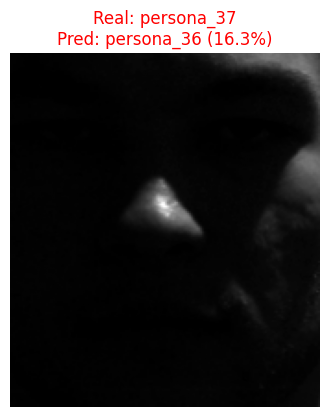


--- ERROR en índice 291 ---


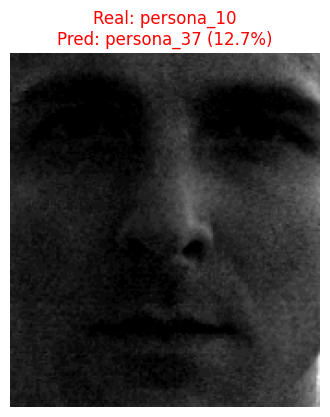


--- ERROR en índice 292 ---


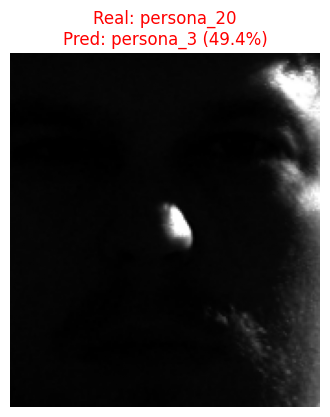

In [57]:
print("Mostrando solo errores en X_test:")
errores = np.where(y_test != y_pred)[0]

for i in errores[:9]:  # Primeros 5 errores
    print(f"\n--- ERROR en índice {i} ---")
    mostrar_imagen_con_prediccion(i, X_test, y_test, y_pred, confianzas, class_names)

In [56]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy en X_test: {accuracy*100:.2f}%")


https://github.com/Ivandres27/Reconocimiento-Facial-CNN.git


Accuracy en X_test: 97.51%


In [39]:
from sklearn.metrics import accuracy_score, classification_report

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy en test: {accuracy*100:.2f}%")

# Reporte detallado
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=class_names))


Accuracy en test: 97.51%

Reporte de clasificación:
              precision    recall  f1-score   support

   persona_1       0.93      1.00      0.96        13
   persona_2       1.00      1.00      1.00        12
   persona_3       0.93      1.00      0.96        13
   persona_4       1.00      1.00      1.00        13
   persona_5       1.00      1.00      1.00        12
   persona_6       0.93      1.00      0.96        13
   persona_7       1.00      1.00      1.00        13
   persona_8       1.00      1.00      1.00        13
   persona_9       0.93      1.00      0.96        13
  persona_10       0.92      0.92      0.92        13
  persona_11       1.00      1.00      1.00        12
  persona_12       1.00      1.00      1.00        11
  persona_13       1.00      1.00      1.00        12
  persona_14       1.00      1.00      1.00        12
  persona_15       1.00      1.00      1.00        12
  persona_16       0.92      1.00      0.96        12
  persona_17       1.00     